# Lab #3 - Decision Tree Classification [Breast Cancer]
---

**Author - Aman Hussain**

**Reg. - 15BCE1077**

**Email - aman.hussain2015@vit.ac.in**
***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

## Load data

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data = np.c_[cancer.data, cancer.target],
                  columns=np.append(cancer['feature_names'], ['cancer']))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                   test_size=0.25, random_state=0,
                                   stratify=cancer.target)

## Data Analysis

In [4]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
features_1of6 = np.append(cancer['feature_names'][0:5], 'cancer')
features_2of6 = np.append(cancer['feature_names'][6:10], 'cancer')
features_3of6 = np.append(cancer['feature_names'][11:15], 'cancer')
features_4of6 = np.append(cancer['feature_names'][16:20], 'cancer')
features_5of6 = np.append(cancer['feature_names'][21:25], 'cancer')
features_6of6 = np.append(cancer['feature_names'][26:31], 'cancer')

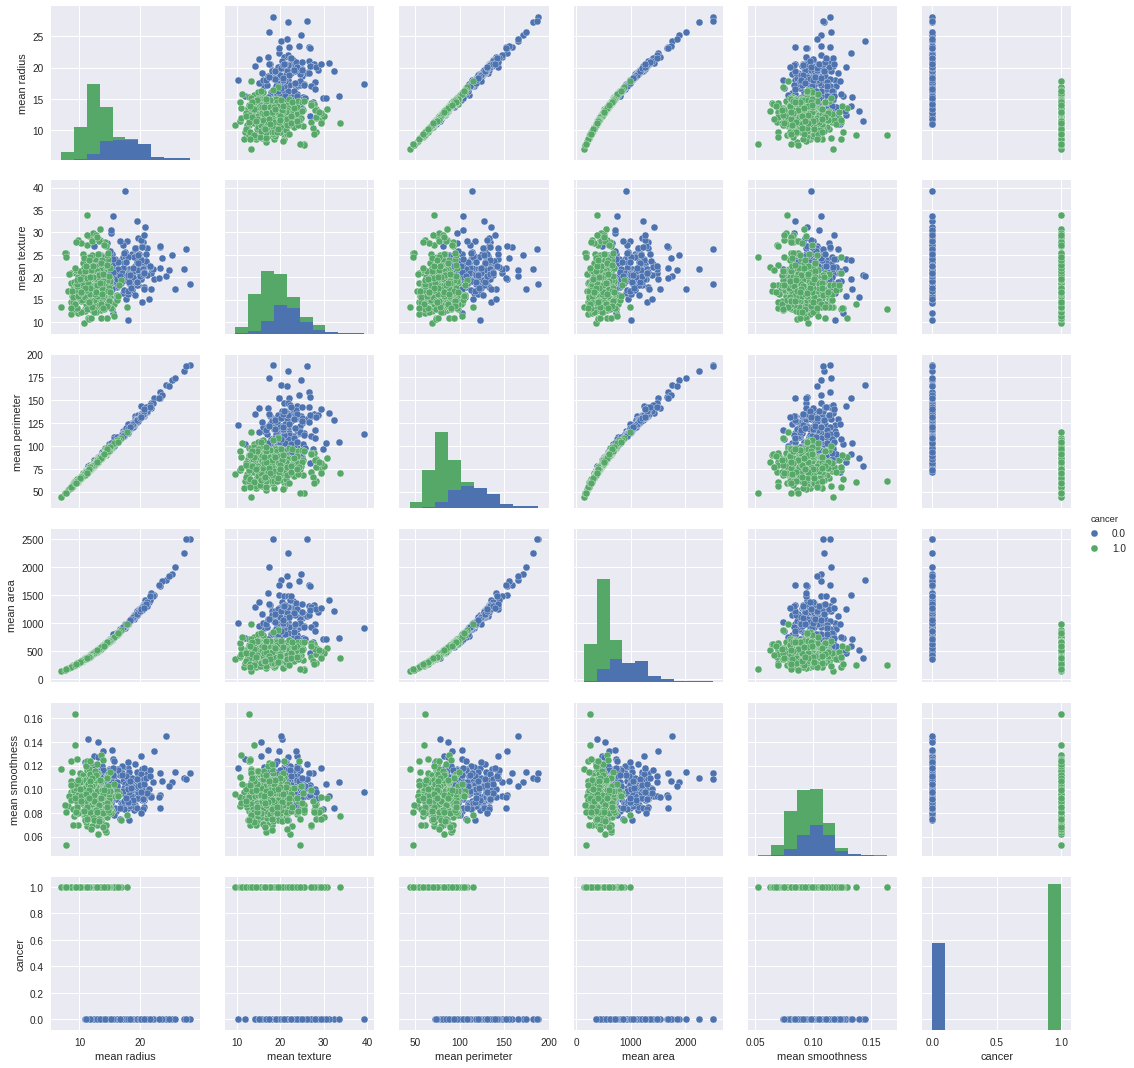

In [6]:
sns.pairplot(df[features_1of6], hue='cancer')

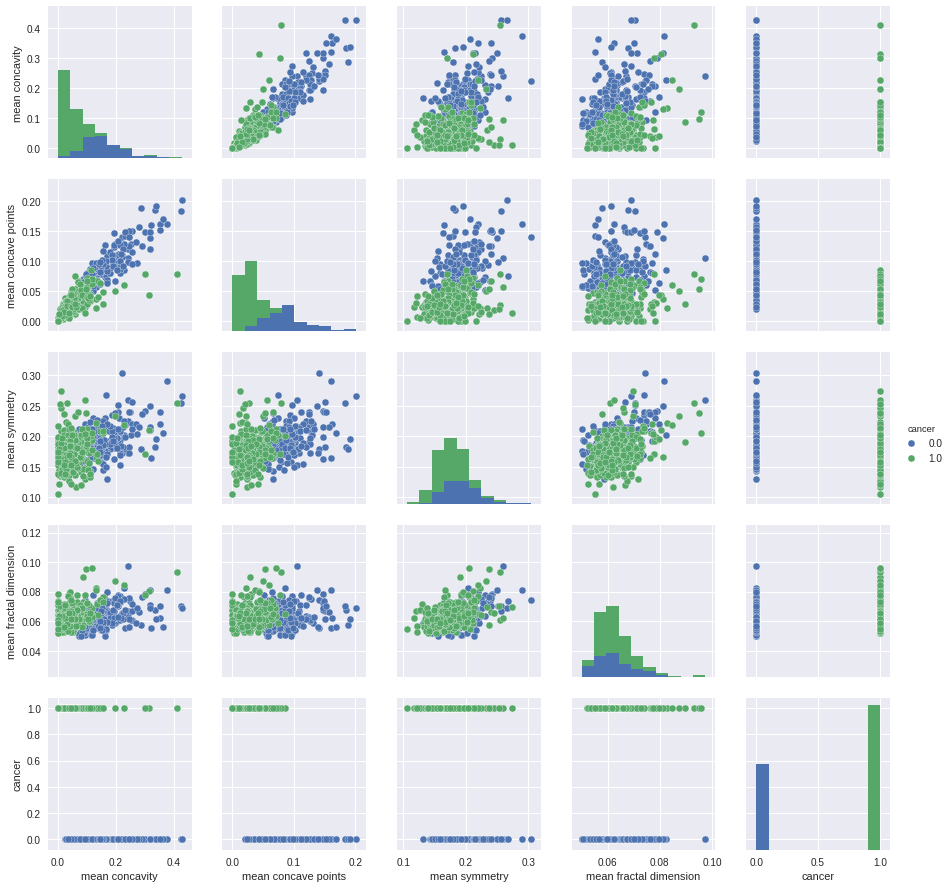

In [7]:
sns.pairplot(df[features_2of6], hue='cancer')

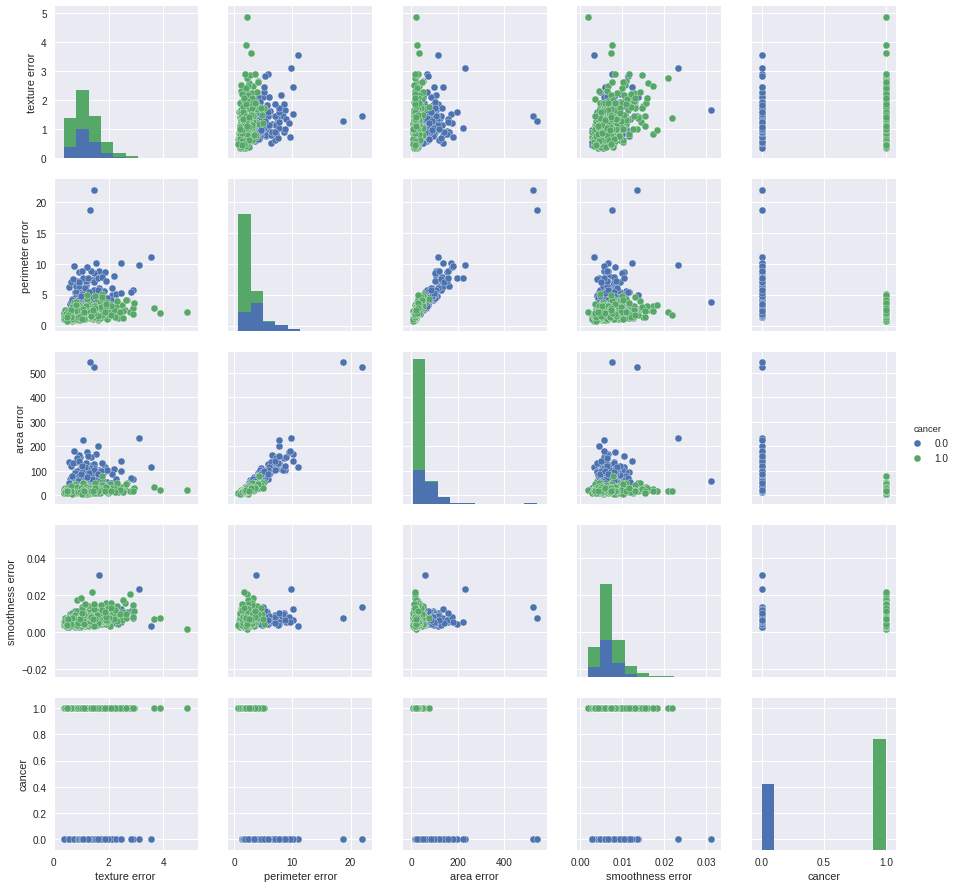

In [8]:
sns.pairplot(df[features_3of6], hue='cancer')

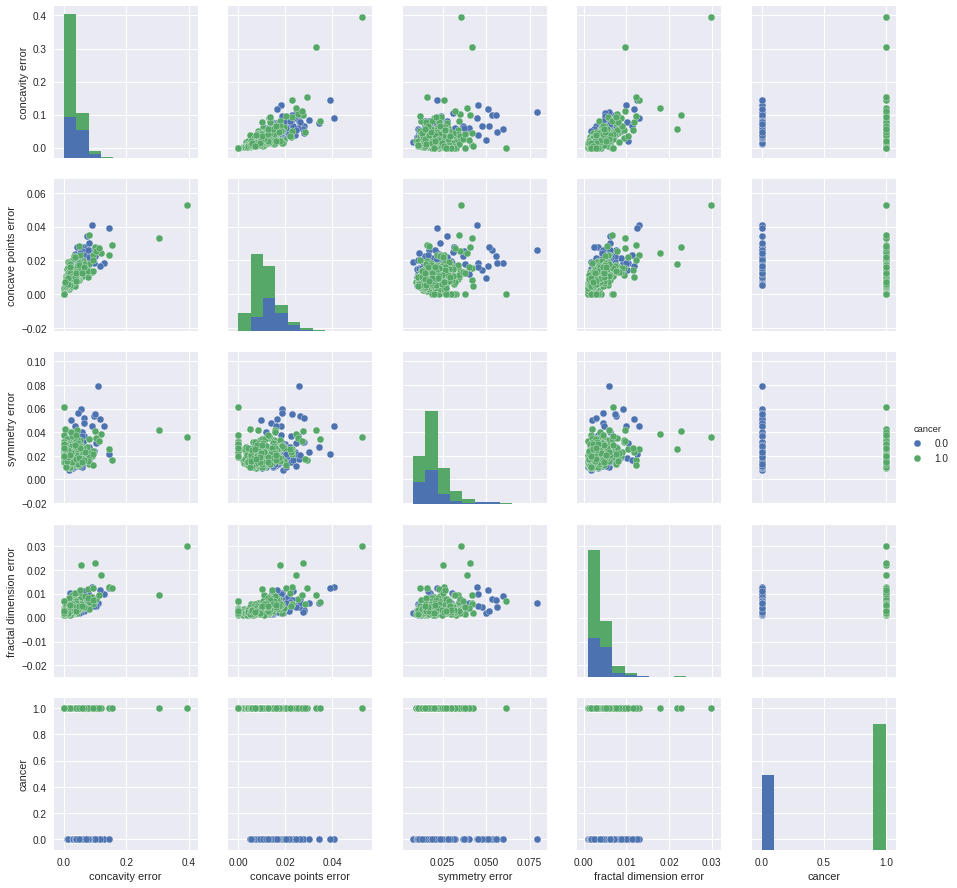

In [9]:
sns.pairplot(df[features_4of6], hue='cancer')

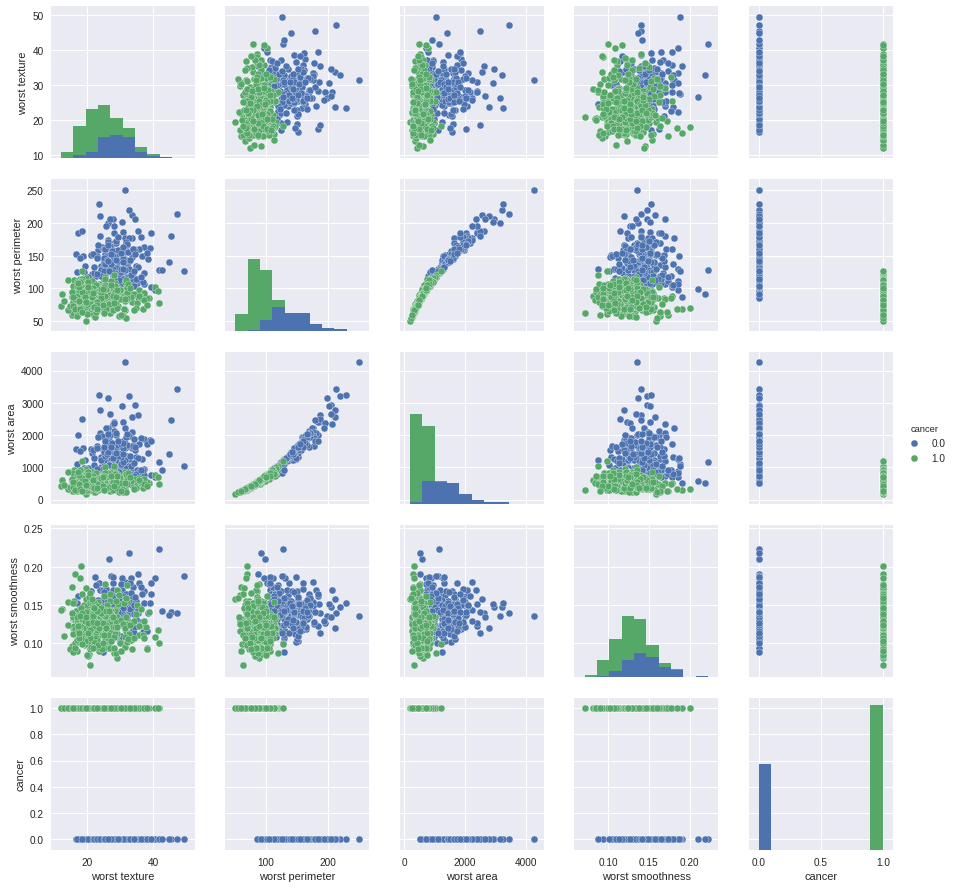

In [10]:
sns.pairplot(df[features_5of6], hue='cancer')

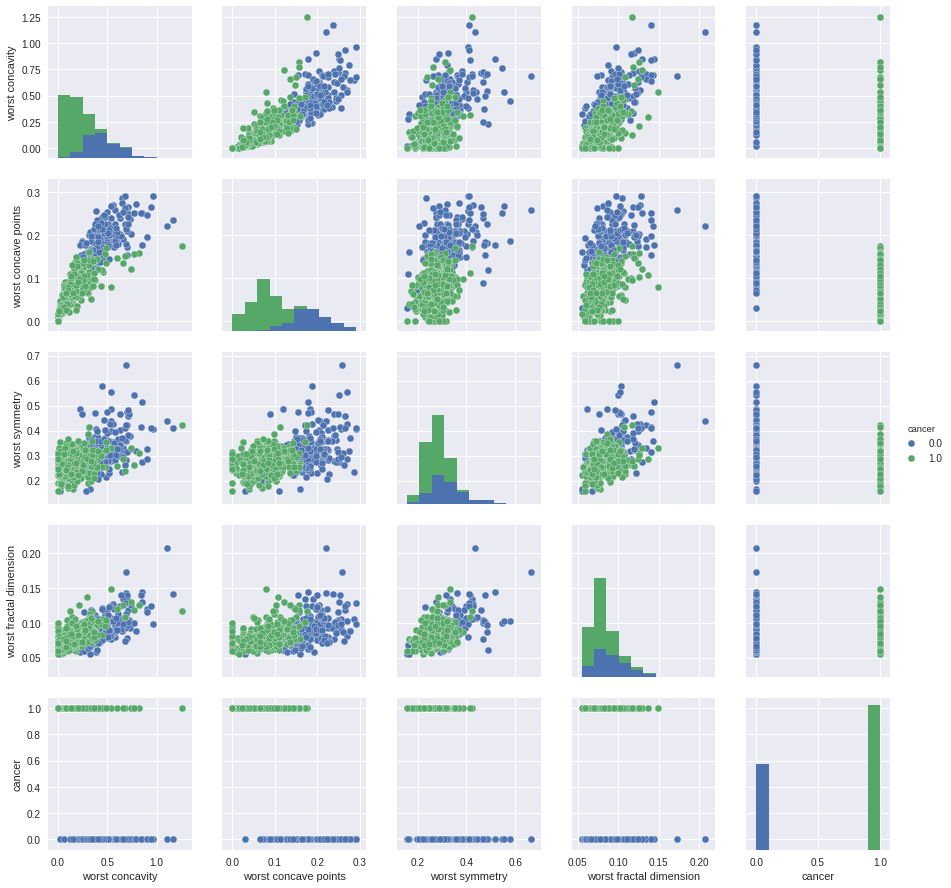

In [11]:
sns.pairplot(df[features_6of6], hue='cancer')

## Train Decision Tree

In [12]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, presort=True)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=True, random_state=None, splitter='best')

## Visualize the Decision Tree

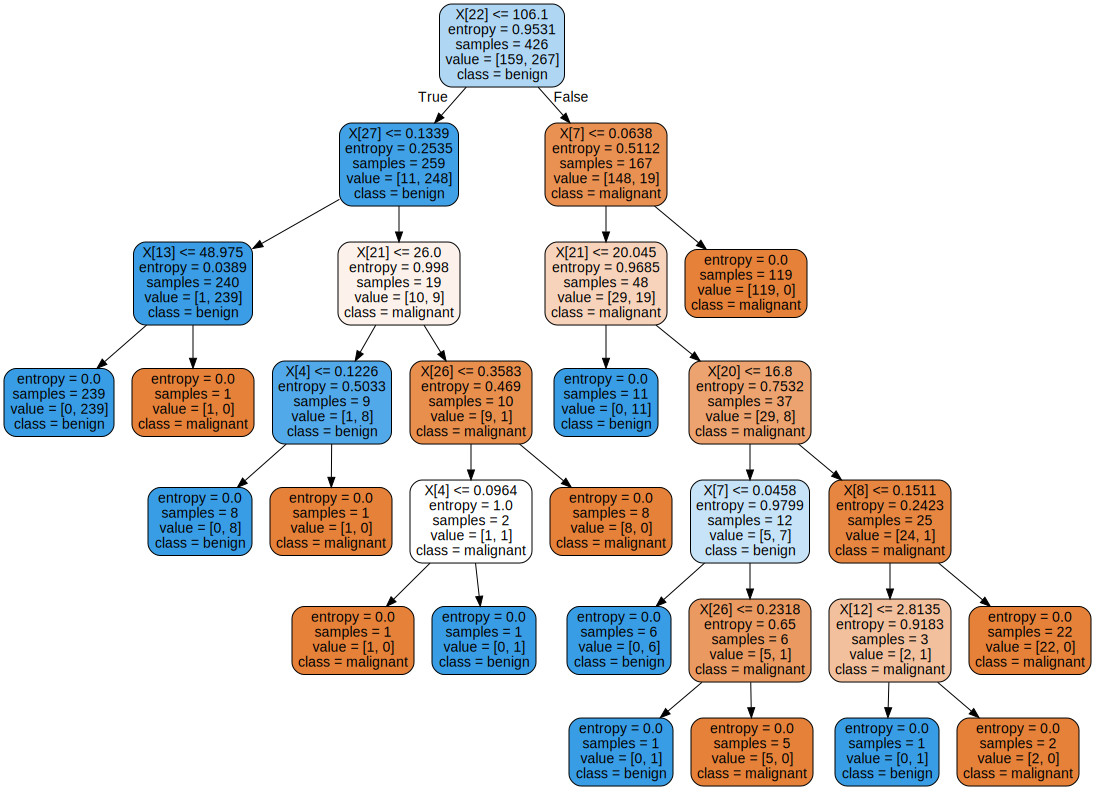

In [13]:
export_graphviz(clf, out_file='Figures/decisiontree_cancer.dot',
                class_names=['malignant', 'benign'], rounded=True, filled=True)

with open('Figures/decisiontree_cancer.dot', 'r') as f:
    tree_graph = f.read()
    
graphviz.render(engine='dot', format='png', filepath='Figures/decisiontree_cancer.dot')
graphviz.Source(tree_graph, engine='dot', format='png')

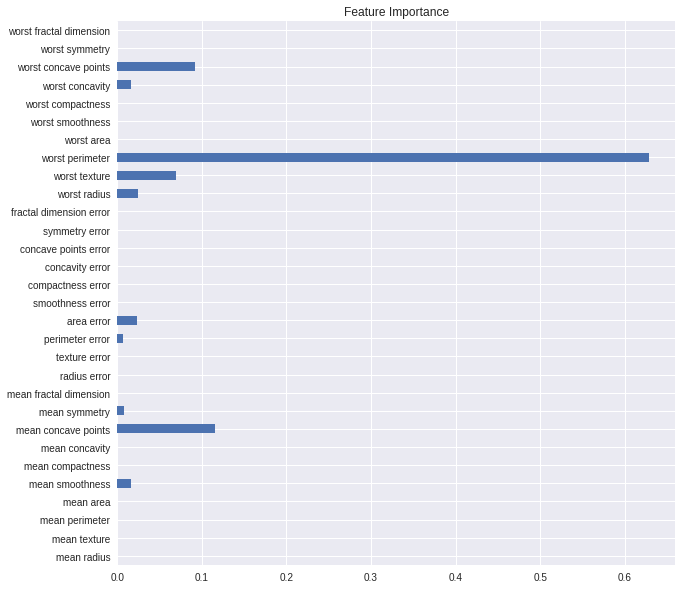

In [14]:
features_importance = pd.DataFrame(data=clf.feature_importances_.T,index=cancer.feature_names)
features_importance.plot.barh(figsize=(10,10), title='Feature Importance', legend=None)

## Classifier Performance

In [15]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [16]:
print('Score on training set: {:.2f}'.format(train_score))
print('Score on test set: {:.2f}'.format(test_score))

Score on training set: 1.00
Score on test set: 0.94


In [17]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=45)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  3]
 [ 6 84]]


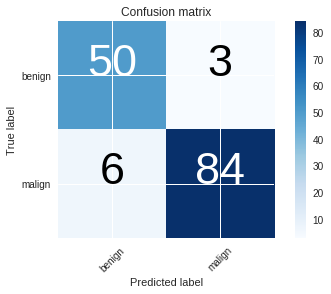

In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cnf_matrix, classes=['benign','malign'])

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, clf.predict(X_test))

0.94915254237288149

## Conclusion
---

**Hence, we have classified the test symptoms into benign and malign cancer with a F1 score of 93%.**